# Analysis of the Results

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import re
from nltk.corpus import stopwords
import spacy
import folium

In [53]:
def clean_french_text(text):
    text = text.lower()
    text = re.sub(r'\W+', ' ', text)
    words = text.split()
    words = [word for word in words if word not in french_stopwords]
    return ' '.join(words)

nlp = spacy.load("fr_core_news_md")

french_stopwords = set(stopwords.words("french"))

### Analysis final database

In [ ]:
df = pd.read_excel("../databases/Database_Not_Provided.xlsx")  
df['date'] = pd.to_datetime(df['date'])

In [56]:
# Take only data where we have the geographical placement
data = df.dropna(subset=['latitude', 'longitude']).reset_index(drop=True)

# Create a map
swiss_map = folium.Map(location=[46.6, 8.3],
                       zoom_start=8)

folium.TileLayer('cartodbpositron').add_to(swiss_map)

for _, row in data.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=4,  
        fill=True,
        fill_color= 'blue' if row['New_mannually'] == 1  else ('#D13F31'),  # Fill color
        fill_opacity=0.7,
        stroke = False ,
        opacity=0.6
    ).add_to(swiss_map)


swiss_map


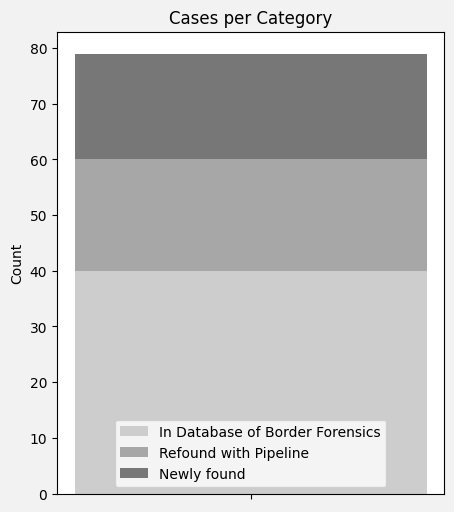

In [57]:
# Replace categories
df['New_mannually'] = df['New_mannually'].astype(str)
df['New_mannually'] = df['New_mannually'].replace({
    '1': 'Newly found',
    '2': 'Refound with Pipeline',
    '0': "In Database of Border Forensics"
})

counts = df['New_mannually'].value_counts()
categories = counts.index
values = counts.values

plt.figure(figsize=(5, 6), facecolor='#F2F2F2')

bottom = 0
colors = ['#cdcdcd','#a7a7a7',  '#777777'] 
for i, (cat, val) in enumerate(zip(categories, values)):
    plt.bar(0, val, bottom=bottom, label=cat, color=colors[i % len(colors)], width= 0.1)
    bottom += val

plt.xticks([0], [''])
plt.ylabel('Count')
plt.title('Cases per Category')
plt.legend(loc='lower center')
plt.show()


### Analyse the part of world data inside the outcome of Pipeline 1

In [58]:
df_outcomes_p1 = pd.read_excel("..\Final_datasets\Pas_touche\Pipeline1_Outcome.xlsx")
df_outcomes_p1 = df_outcomes_p1[df_outcomes_p1['All (lethal police violence)'] > 0.5]

count_monde = df_outcomes_p1[df_outcomes_p1['link'].str.startswith("https://www.letemps.ch/monde/")]
count_suisse =df_outcomes_p1[df_outcomes_p1['link'].str.startswith("https://www.letemps.ch/suisse/")]

In [59]:
rest = len(df_outcomes_p1) - len(count_monde) -len(count_suisse)

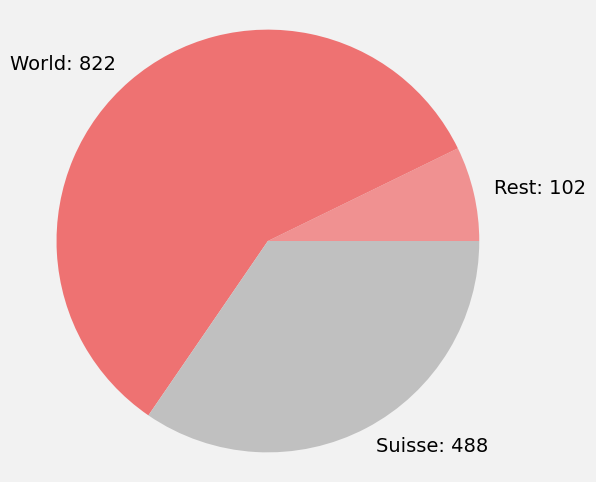

In [60]:
values = [rest, len(count_monde), len(count_suisse)]
labels = ['Rest', 'World', 'Suisse']
colors = ['#f09191', '#ee7272', '#c0c0c0']

labels_with_values = [f'{l}: {v}' for l, v in zip(labels, values)]

plt.figure(figsize=(6, 6), facecolor='#F2F2F2')
plt.pie(values, labels=labels_with_values, colors=colors, textprops={'fontsize': 14})
plt.axis('equal')
plt.show()
